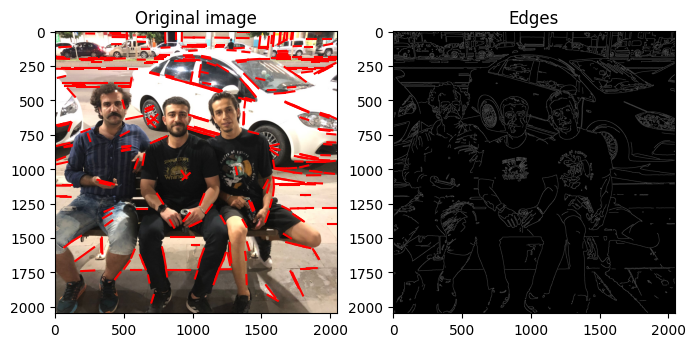

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color, feature, transform

# Load the image
img = io.imread('pablo.JPG')

# Convert the image to grayscale
gray_img = color.rgb2gray(img)

# Detect the edges using the Canny edge detector
edges = feature.canny(gray_img, sigma=2)

# Transform the edges into a Hough space
h, theta, d = transform.hough_line(edges)

# Find the most prominent lines in the Hough space
lines = transform.probabilistic_hough_line(edges, threshold=10, line_length=50, line_gap=5)

# Convert the lines into vectors
vectors = []
for line in lines:
    x1, y1 = line[0]
    x2, y2 = line[1]
    vector = [x2 - x1, y2 - y1]
    vectors.append(vector)

# Plot the original image and the detected lines
fig, axes = plt.subplots(1, 2, figsize=(8, 4))
ax = axes.ravel()

ax[0].imshow(img)
ax[0].set_title('Original image')

for line in lines:
    ax[0].plot((line[0][0], line[1][0]), (line[0][1], line[1][1]), 'r-')

ax[1].imshow(edges, cmap=plt.cm.gray)
ax[1].set_title('Edges')

plt.show()
